# Import Modules

In [1]:
import sys
import os
import os.path as path

from netCDF4 import Dataset
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

/g/g92/jha3/VirtualEnv/py3_ml_wind/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# Paths

In [2]:
WRF_result_base_loc ='/p/lustre2/jha3/fromWill/TurbTest/NREL_5MW'
GAD_param_output_loc = os.path.join(WRF_result_base_loc, 'GAD_Param_Study_Output')
GAD_param_power_curve_loc = os.path.join(GAD_param_output_loc, 'PowerCurve')
os.system('mkdir -p %s'%GAD_param_power_curve_loc)
#inputs
savefig = True

# Flags

In [3]:
induction_effect = True
grid_effect = False
epsilon_effect = False

# Effect of Induction Type

In [4]:
if induction_effect:
	figFileName = os.path.join(GAD_param_power_curve_loc, 'power_induction.png')
	tab_data_file = os.path.join(GAD_param_power_curve_loc, 'power_induction.csv')
	plt_title   = '$Grid: \Delta x = \Delta y = 4 m, \Delta z = 4 m; Gaussian: \epsilon/\Delta_{grid} = 1.00 $'
	case_dir_map = {'Glauert_Tip_dx_04_dz_04_an_fixed_at_iter_eps_1.00': {'legend':'Glauert, a$_{n}$ = 0.07, a$_{t}$ = iterated', 'line_style': 'b'},
		        'Glauert_Tip_dx_04_dz_04_an_iter_at_iter_eps_1.00': {'legend':'Glauert, a$_{n}$ = iterated, a$_{t}$ = iterated', 'line_style': 'g'},
			'Shen_Tip_dx_04_dz_04_an_fixed_at_iter_eps_1.00': {'legend':'Shen, a$_{n}$ = 0.07, a$_{t}$ = iterated', 'line_style': 'r--'},
			'Shen_Tip_dx_04_dz_04_an_iter_at_iter_eps_1.00': {'legend':'Shen, a$_{n}$ = iterated, a$_{t}$ = iterated', 'line_style': 'm--'},
			'Tip_dx_04_dz_04_an_0.0_at_0.0_eps_1.00': {'legend':'a$_{n}$ = 0.0, a$_{t}$ = 0.0', 'line_style': 'c'}}

# Effect of Grid Resolution

In [5]:
if grid_effect:
	figFileName = os.path.join(GAD_param_power_curve_loc, 'power_grid_effect.png')
	tab_data_file = os.path.join(GAD_param_power_curve_loc, 'power_grid_effect.csv')
	plt_title   = '$ Induction: Glauert, a_{n} = 0.07, a_{t} = iterated; Gaussian: \epsilon/\Delta_{grid} = 1.00 $'
	case_dir_map = {'Glauert_Tip_dx_04_dz_04_an_fixed_at_iter_eps_1.00': {'legend':'$\Delta x = \Delta y = 4 m, \Delta z = 4 m $', 'line_style': 'b'},
			'Glauert_Tip_dx_08_dz_08_an_fixed_at_iter_eps_1.00': {'legend':'$\Delta x = \Delta y = 8 m, \Delta z = 8 m $', 'line_style': 'g'},
			'Glauert_Tip_dx_16_dz_04_an_fixed_at_iter_eps_1.00': {'legend':'$\Delta x = \Delta y = 16 m, \Delta z = 4 m $', 'line_style': 'r--'},
			'Glauert_Tip_dx_16_dz_16_an_fixed_at_iter_eps_1.00': {'legend':'$\Delta x = \Delta y = 16 m, \Delta z = 16 m $', 'line_style': 'm--'}}

# Effect of Gaussian Spreading

In [6]:
if epsilon_effect:
	figFileName = os.path.join(GAD_param_power_curve_loc, 'power_gaussian_effect.png')
	tab_data_file = os.path.join(GAD_param_power_curve_loc, 'power_gaussian_effect.csv')
	plt_title   = '$Grid: \Delta x = \Delta y = 4 m, \Delta z = 4 ; Induction: Glauert, a_{n} = 0.07, a_{t} = iterated $'
	case_dir_map = {'Glauert_Tip_dx_04_dz_04_an_fixed_at_iter_eps_0.707': {'legend':'$ \epsilon/\Delta_{grid} = 1/\sqrt{2} $', 'line_style': 'b'},
			'Glauert_Tip_dx_04_dz_04_an_fixed_at_iter_eps_1.00': {'legend':'$ \epsilon/\Delta_{grid} = 1.00$', 'line_style': 'g'},
			'Glauert_Tip_dx_04_dz_04_an_fixed_at_iter_eps_1.4142': {'legend':'$ \epsilon/\Delta_{grid} = \sqrt{2} $', 'line_style': 'r--'},
			'Glauert_Tip_dx_04_dz_04_an_fixed_at_iter_eps_2.00': {'legend':'$ \epsilon/\Delta_{grid} = 2.00 $', 'line_style': 'm--'}}

# Common Stuff

In [7]:
vhub = [3, 4.5, 6, 7.5, 9, 10.5, 12, 13.5, 15]
#vhub = [3, 4.5, 6, 7.5, 9, 10.5, 13.5, 15, 18]
ind1_for_tab = 3 # To be used in the paper
ind2_for_tab = 4 # To be used in the paper
ind3_for_tab = 5 # To be used in the paper
outfile = 'wrfout_d01_0001-01-01_00:00:00'

# NREL Data

In [8]:
NREL_Data = pd.read_csv(os.path.join(WRF_result_base_loc,'NREL_5MW_126_RWT.csv'))
ws_NREL    = list(NREL_Data['Wind Speed [m/s]'])
power_NREL = list(NREL_Data['Power [kW]'])

f = interpolate.interp1d(ws_NREL, power_NREL)
power_interp = f(vhub)

# Cases of Interest

In [9]:
case_keys = list(case_dir_map.keys())
case_keys.sort()
print ('Cases: \n {}'.format(case_keys))

Cases: 
 ['Glauert_Tip_dx_04_dz_04_an_fixed_at_iter_eps_1.00', 'Glauert_Tip_dx_04_dz_04_an_iter_at_iter_eps_1.00', 'Shen_Tip_dx_04_dz_04_an_fixed_at_iter_eps_1.00', 'Shen_Tip_dx_04_dz_04_an_iter_at_iter_eps_1.00', 'Tip_dx_04_dz_04_an_0.0_at_0.0_eps_1.00']


In [10]:
case_tab = ['NREL']
power1_tab = [power_interp[ind1_for_tab]*1.0e+3]
power2_tab = [power_interp[ind2_for_tab]*1.0e+3]
power3_tab = [power_interp[ind3_for_tab]*1.0e+3]
error1_tab = [0.0]
error2_tab = [0.0]
error3_tab = [0.0]

## Read the Data for Cases of Interest

In [11]:
print ('Cases under consideration : \n')
for case in case_keys:
    print('Case: {}'.format(case))
    print('Legend: {}'.format(case_dir_map[case]['legend']))
    case_tab.append(case)

    power_case_ws = np.zeros(len(vhub))
    for ind_vhub, ws_hub in enumerate(vhub):
        case_for_ws = path.join(WRF_result_base_loc, case, 'power_curve_{}'.format(ws_hub))
        #print ('case_for_ws: {}'.format(case_for_ws))
        case_nc_file = path.join(case_for_ws, outfile)
        #print ('case_nc_file: {}'.format(case_nc_file))
        case_data = Dataset(case_nc_file, mode='r')
        case_power = case_data.variables['POWER'][:]
        #print ('case_power: ', case_power)
        case_data.close()
        
        if (len(case_power) <2):
            power_case_ws[ind_vhub] = np.nan
        else:
            power_case_ws[ind_vhub] = case_power[1]

    #print('power_case_ws: ', power_case_ws)
    case_dir_map[case]['power'] = power_case_ws

    error_NREL = (power_case_ws*1e-3/power_interp - 1.0)*100
    case_dir_map[case]['error'] = error_NREL

    print('Power: {}'.format(case_dir_map[case]['power']))
    print('Error w.r.t. NREL: {}'.format(case_dir_map[case]['error']))

    power1_tab.append(float('%.0f'%(power_case_ws[ind1_for_tab])))
    power2_tab.append(float('%.0f'%(power_case_ws[ind2_for_tab])))
    power3_tab.append(float('%.0f'%(power_case_ws[ind3_for_tab])))
    error1_tab.append(float('%5.2f'%(error_NREL[ind1_for_tab])))
    error2_tab.append(float('%5.2f'%(error_NREL[ind2_for_tab])))
    error3_tab.append(float('%5.2f'%(error_NREL[ind3_for_tab])))

    print ('\n')

Cases under consideration : 

Case: Glauert_Tip_dx_04_dz_04_an_fixed_at_iter_eps_1.00
Legend: Glauert, a$_{n}$ = 0.07, a$_{t}$ = iterated
Power: [  55163.421875  302231.71875   785571.4375   1535019.
 2634574.       4201333.5      5712205.5      4934324.5
 4533012.5     ]
Error w.r.t. NREL: [36.20597994  3.93112749  6.50371983  3.77710171  4.60470102  5.44218959
 14.24411    -1.31351    -9.33975   ]


Case: Glauert_Tip_dx_04_dz_04_an_iter_at_iter_eps_1.00
Legend: Glauert, a$_{n}$ = iterated, a$_{t}$ = iterated
Power: [  55991.203125  111369.96875   321983.0625    765431.0625
 1390595.375    2224565.25     3723411.5      4196047.
            nan]
Error w.r.t. NREL: [ 38.24988426 -61.70221157 -56.34719868 -48.25196481 -44.78696994
 -44.16938554 -25.53177    -16.07906             nan]


Case: Shen_Tip_dx_04_dz_04_an_fixed_at_iter_eps_1.00
Legend: Shen, a$_{n}$ = 0.07, a$_{t}$ = iterated
Power: [  55193.35546875  302243.125       785439.375      1535001.
 2634363.5        4201135.         

## Prepare Tabulated Data for a few Wind Speeds

In [12]:
tabulated_data = pd.DataFrame(index = case_tab)
tabulated_data['power[vhub = {}]'.format(vhub[ind1_for_tab])] = power1_tab
tabulated_data['error[vhub = {}]'.format(vhub[ind1_for_tab])] = error1_tab
tabulated_data['power[vhub = {}]'.format(vhub[ind2_for_tab])] = power2_tab
tabulated_data['error[vhub = {}]'.format(vhub[ind2_for_tab])] = error2_tab
tabulated_data['power[vhub = {}]'.format(vhub[ind3_for_tab])] = power3_tab
tabulated_data['error[vhub = {}]'.format(vhub[ind3_for_tab])] = error3_tab
print('Tabulated Dataframe: \n{}\n'.format(tabulated_data))
tabulated_data.to_csv(tab_data_file)

Tabulated Dataframe: 
                                                   power[vhub = 7.5]  \
NREL                                                       1479150.0   
Glauert_Tip_dx_04_dz_04_an_fixed_at_iter_eps_1.00          1535019.0   
Glauert_Tip_dx_04_dz_04_an_iter_at_iter_eps_1.00            765431.0   
Shen_Tip_dx_04_dz_04_an_fixed_at_iter_eps_1.00             1535001.0   
Shen_Tip_dx_04_dz_04_an_iter_at_iter_eps_1.00               824527.0   
Tip_dx_04_dz_04_an_0.0_at_0.0_eps_1.00                     1691578.0   

                                                   error[vhub = 7.5]  \
NREL                                                            0.00   
Glauert_Tip_dx_04_dz_04_an_fixed_at_iter_eps_1.00               3.78   
Glauert_Tip_dx_04_dz_04_an_iter_at_iter_eps_1.00              -48.25   
Shen_Tip_dx_04_dz_04_an_fixed_at_iter_eps_1.00                  3.78   
Shen_Tip_dx_04_dz_04_an_iter_at_iter_eps_1.00                 -44.26   
Tip_dx_04_dz_04_an_0.0_at_0.0_eps_1.00   

# Create Plots

## Power Curve

/collab/usr/gapps/python/build/spack-toss3.3/opt/spack/linux-rhel7-x86_64/gcc-4.9.3/python-3.7.2-asydydmavj2puklmx5t6cu3ruzmg2b3a/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/collab/usr/gapps/python/build/spack-toss3.3/opt/spack/linux-rhel7-x86_64/gcc-4.9.3/python-3.7.2-asydydmavj2puklmx5t6cu3ruzmg2b3a/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/collab/usr/gapps/python/build/spack-toss3.3/opt/spack/linux-rhel7-x86_64/gcc-4.9.3/python-3.7.2-asydydmavj2puklmx5t6cu3ruzmg2b3a/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for mult

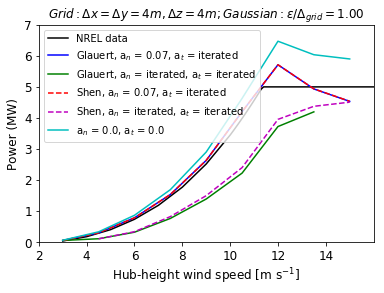

<Figure size 432x288 with 0 Axes>

In [13]:
#plot
pr = 1.00

plt.cla()
# POWER Curve
plt.figure(1)
plt.plot(NREL_Data['Wind Speed [m/s]'], NREL_Data['Power [kW]']*1e-3/pr, 'k-', label = 'NREL data')
#plt.plot([0,20],[5,5],'k--',label='Rated power')
for case in case_keys:
    power_case_ws = case_dir_map[case]['power']
    legend = case_dir_map[case]['legend']
    line_style = case_dir_map[case]['line_style']
    plt.plot(vhub, power_case_ws*1e-6/pr, line_style, label=legend)
plt.title(plt_title,fontsize=12)
plt.xlim(2,16)
plt.xticks(np.arange(2,16,2))
plt.ylim(0,7.0)
plt.xlabel(r'Hub-height wind speed [m s$^{-1}$]',fontsize=12)
plt.ylabel(r'Power (MW)',fontsize=12)
plt.legend(loc='best')
plt.gca().tick_params(labelsize=12)
plt.show()

if savefig:
    plt.savefig(figFileName,dpi=300)

## Error in Power Curve

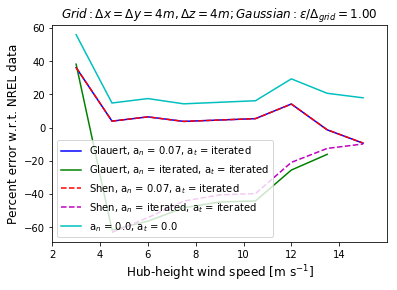

In [14]:
# Error w.r.t. NREL data
plt.figure(2)
for case in case_keys:
    error_case_ws = case_dir_map[case]['error']
    legend = case_dir_map[case]['legend']
    line_style = case_dir_map[case]['line_style']
    plt.plot(vhub, error_case_ws, line_style, label=legend)
plt.title(plt_title,fontsize=12)
plt.xlim(2,16)
plt.xticks(np.arange(2,16,2))
plt.xlabel(r'Hub-height wind speed [m s$^{-1}$]',fontsize=12)
plt.ylabel(r'Percent error w.r.t. NREL data',fontsize=12)
plt.legend(loc='best')
plt.gca().tick_params(labelsize=10)

plt.show()